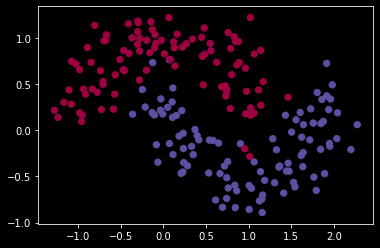

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

np.random.seed(3)

X,y=datasets.make_moons(200,noise=0.20)
plt.style.use('dark_background')
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

Epoch 1/10
150/150 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.7133
Epoch 2/10
150/150 [==============================] - 0s 816us/step - loss: 0.0967 - accuracy: 0.8733
Epoch 3/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.8867
Epoch 4/10
150/150 [==============================] - 0s 909us/step - loss: 0.0944 - accuracy: 0.8667
Epoch 5/10
150/150 [==============================] - 0s 838us/step - loss: 0.0937 - accuracy: 0.8667
Epoch 6/10
150/150 [==============================] - 0s 725us/step - loss: 0.0929 - accuracy: 0.8800
Epoch 7/10
150/150 [==============================] - 0s 718us/step - loss: 0.0931 - accuracy: 0.8867
Epoch 8/10
150/150 [==============================] - 0s 917us/step - loss: 0.0932 - accuracy: 0.8733
Epoch 9/10
150/150 [==============================] - 0s 984us/step - loss: 0.0930 - accuracy: 0.8867
Epoch 10/10
50/50 [==============================] - 0s 738us/step


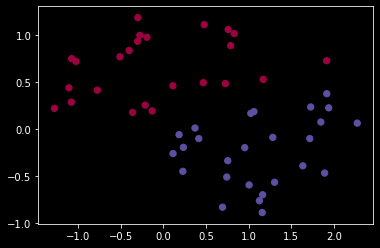

In [8]:
x_train = X[:150]
y_train = y[:150]
x_test = X[150:]
y_test = y[150:]

model = Sequential()
model.add(Dense(1, input_dim=2, activation='linear'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', 
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=10,
          batch_size=1)
score = model.evaluate(x_test, y_test, batch_size=1)

prediction=model.predict(x_test,batch_size=1)
error=0.0
for i in range(len(x_test)):
  if prediction[i]>=0.5:
    prediction[i]=1
  else:
    prediction[i]=0
  l=prediction[i]-y_test[i]
  error += l**2

y = [y for p in prediction for y in p]

plt.style.use('dark_background')
plt.scatter(x_test[:,0],x_test[:,1],s=40,c=y,cmap=plt.cm.Spectral)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21510622748>)

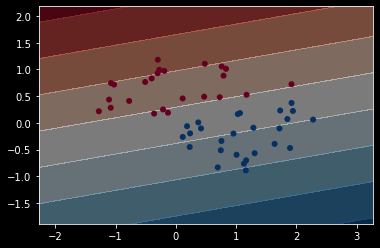

In [9]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)
    
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

plot_decision_boundary(x_test,y,model,cmap='RdBu')
